In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pymatching import Matching
import time

In [15]:
l = 2 # number of sublattice points (2 for toric code) or primal/dual
Nrep = 1000 # number of iterations
L_list = [8]
p1_list = np.linspace(0.003,1,20)
fail_prob_z = np.zeros((len(L_list),len(p1_list)))

for i_L, r in enumerate(L_list):

    tic = time.time()
    print("L= ", r)

    r1 = r # dimension of square
    r2 = r 

    # star stabilzers
    Sx = np.zeros((r1*r2,l*r1*r2),dtype=int)
    for i_y in range(r2):
        for i_x in range(r1):
            Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)] = 1
            Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)+1] = 1
            Sx[i_y*r1 + i_x, 2*(i_y*r1+(i_x-1)%r1 )] = 1
            Sx[i_y*r1 + i_x, 2*(((i_y-1)%r1)*r1+i_x)+1] = 1

    ## x ops
    logicals = np.zeros((2,2*r1*r2))
    logicals[0,1:2*r2+1:2] = np.ones(r2) 
    logicals[1,0:2*r1*r2:2*r2] = np.ones(r1) 

    m_orig = Matching(Sx)

    for i_p, p1 in enumerate(p1_list):
        for i_n in range(Nrep):
            error_table = np.random.rand(l*r1*r2) < p1
            zflip_inds = np.argwhere(error_table == True)[:,0]
            no_zflip_inds = np.argwhere(error_table == False)[:,0]
            error_tot = np.zeros(l*r1*r2,dtype=int)
            error_tot[zflip_inds] = 1

            # find syndrome
            syndrome_x = np.dot(error_tot,Sx.T) % 2
            # solve decoder
            rec_x = m_orig.decode(syndrome_x)
            np.dot( (rec_x + error_tot )%2 , logicals.T) % 2

            assert np.sum(np.dot( (rec_x + error_tot )%2 , Sx.T) % 2) == 0

            ###########
            if np.sum(np.dot( (rec_x + error_tot )%2, logicals.T) %2)  > 0:
                fail_prob_z[i_L,i_p] +=  1
    toc = time.time()
    print("Finished in %d secs" % (toc-tic))


print("Done!")

L=  8
Finished in 13 secs
Done!


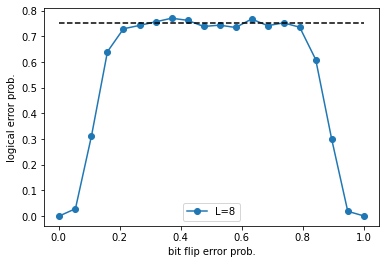

In [16]:
for i_L, L in enumerate(L_list):
    plt.plot(p1_list,fail_prob_z[i_L,:]/Nrep,"o-", label="L=%d" % (L))
    
plt.plot(p1_list, 0.75+0*p1_list,"k--")
plt.xlabel("bit flip error prob.")
plt.ylabel("logical error prob.")
# plt.yscale("log")
plt.legend()
plt.show()